In [1]:
#Loading and Inspecting the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score,classification_report
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
data = pd.read_excel(file_path)

In [3]:

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [5]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [8]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [9]:
data.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [10]:
for column in data:
    print(column)

EmpNumber
Age
Gender
EducationBackground
MaritalStatus
EmpDepartment
EmpJobRole
BusinessTravelFrequency
DistanceFromHome
EmpEducationLevel
EmpEnvironmentSatisfaction
EmpHourlyRate
EmpJobInvolvement
EmpJobLevel
EmpJobSatisfaction
NumCompaniesWorked
OverTime
EmpLastSalaryHikePercent
EmpRelationshipSatisfaction
TotalWorkExperienceInYears
TrainingTimesLastYear
EmpWorkLifeBalance
ExperienceYearsAtThisCompany
ExperienceYearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
Attrition
PerformanceRating


In [11]:
# Data Preprocessing
data = data.dropna()

In [12]:
print("\nProcessed Data:")
data


Processed Data:


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3


<font size=6 >Univariate Analysis</font>

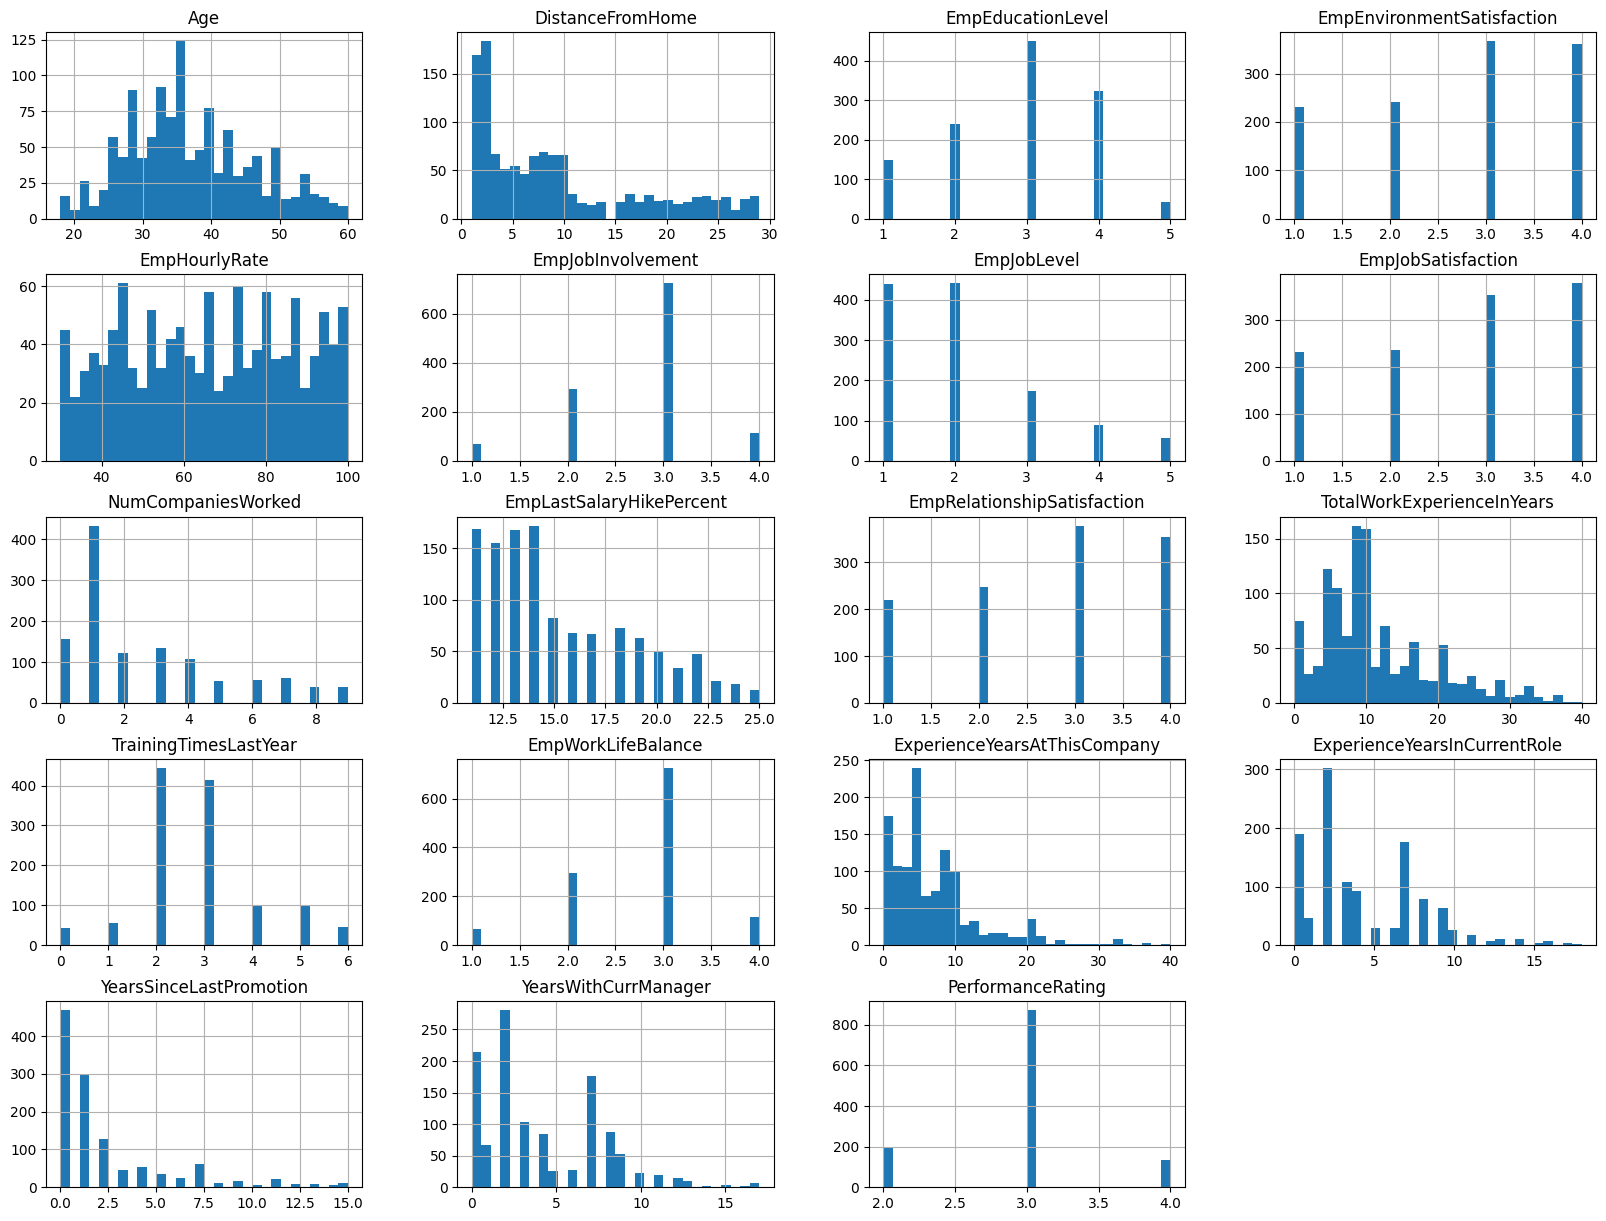

In [13]:
data.hist(bins=30, figsize=(20, 15))
plt.show()

In [14]:
import sweetviz as sv 

my_report = sv.analyze(data)

my_report.show_html() 

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
# Task No.1
# Group by department and calculate mean performance score
dept_performance = data.groupby('EmpDepartment')['PerformanceRating'].mean().reset_index()

In [16]:
print("***Department Wise Performance***")
dept_performance

***Department Wise Performance***


,EmpDepartment,PerformanceRating
0,Data Science,3.050000
1,Development,3.085873
2,Finance,2.775510
3,Human Resources,2.925926
4,Research & Development,2.921283
5,Sales,2.860590


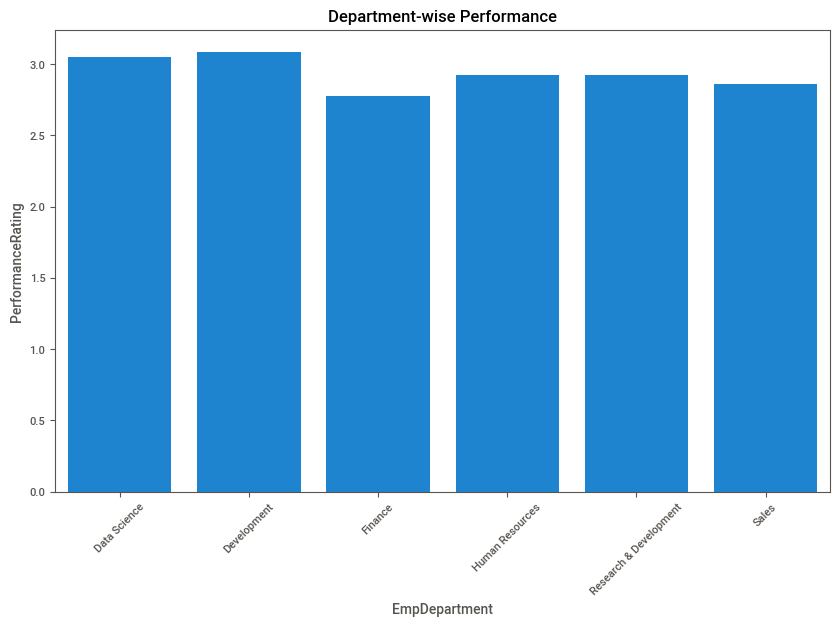

In [17]:
# Plot the department-wise performance
plt.figure(figsize=(10, 6))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=dept_performance)
plt.title('Department-wise Performance')
plt.xticks(rotation=45)
plt.show()

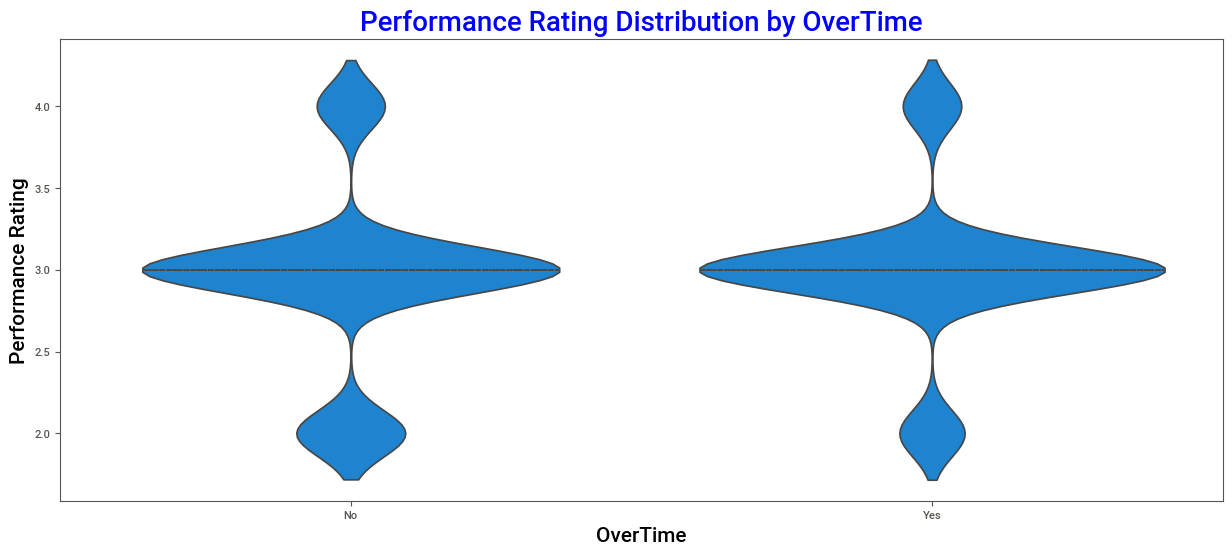

In [18]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=data, x='OverTime', y='PerformanceRating', inner='quartile')
plt.xlabel("OverTime", fontsize=15, color='black')
plt.ylabel("Performance Rating", fontsize=15, color='black')
plt.title("Performance Rating Distribution by OverTime", fontsize=20, color='blue')
plt.show()

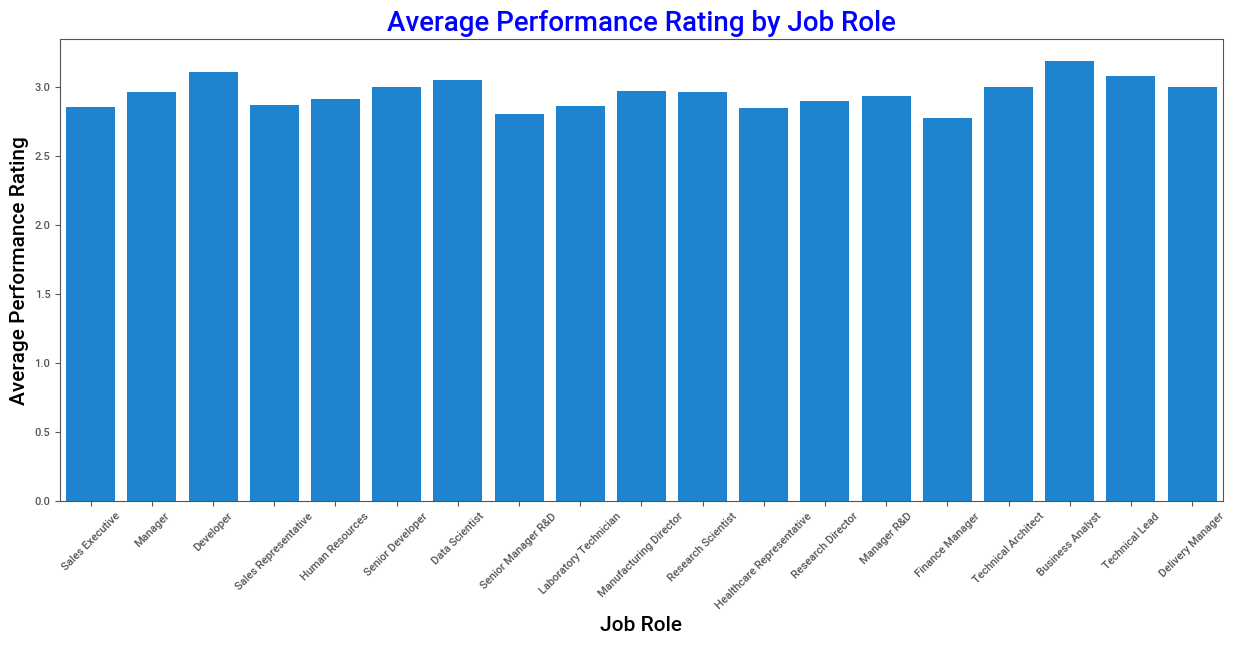

In [19]:
plt.figure(figsize=(15, 6))
sns.barplot(data=data, x='EmpJobRole', y='PerformanceRating', ci=None)
plt.xticks(rotation=45)
plt.xlabel("Job Role", fontsize=15, color='black')
plt.ylabel("Average Performance Rating", fontsize=15, color='black')
plt.title("Average Performance Rating by Job Role", fontsize=20, color='blue')
plt.show()


In [20]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns


In [21]:
# Fit the label encoders during training
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

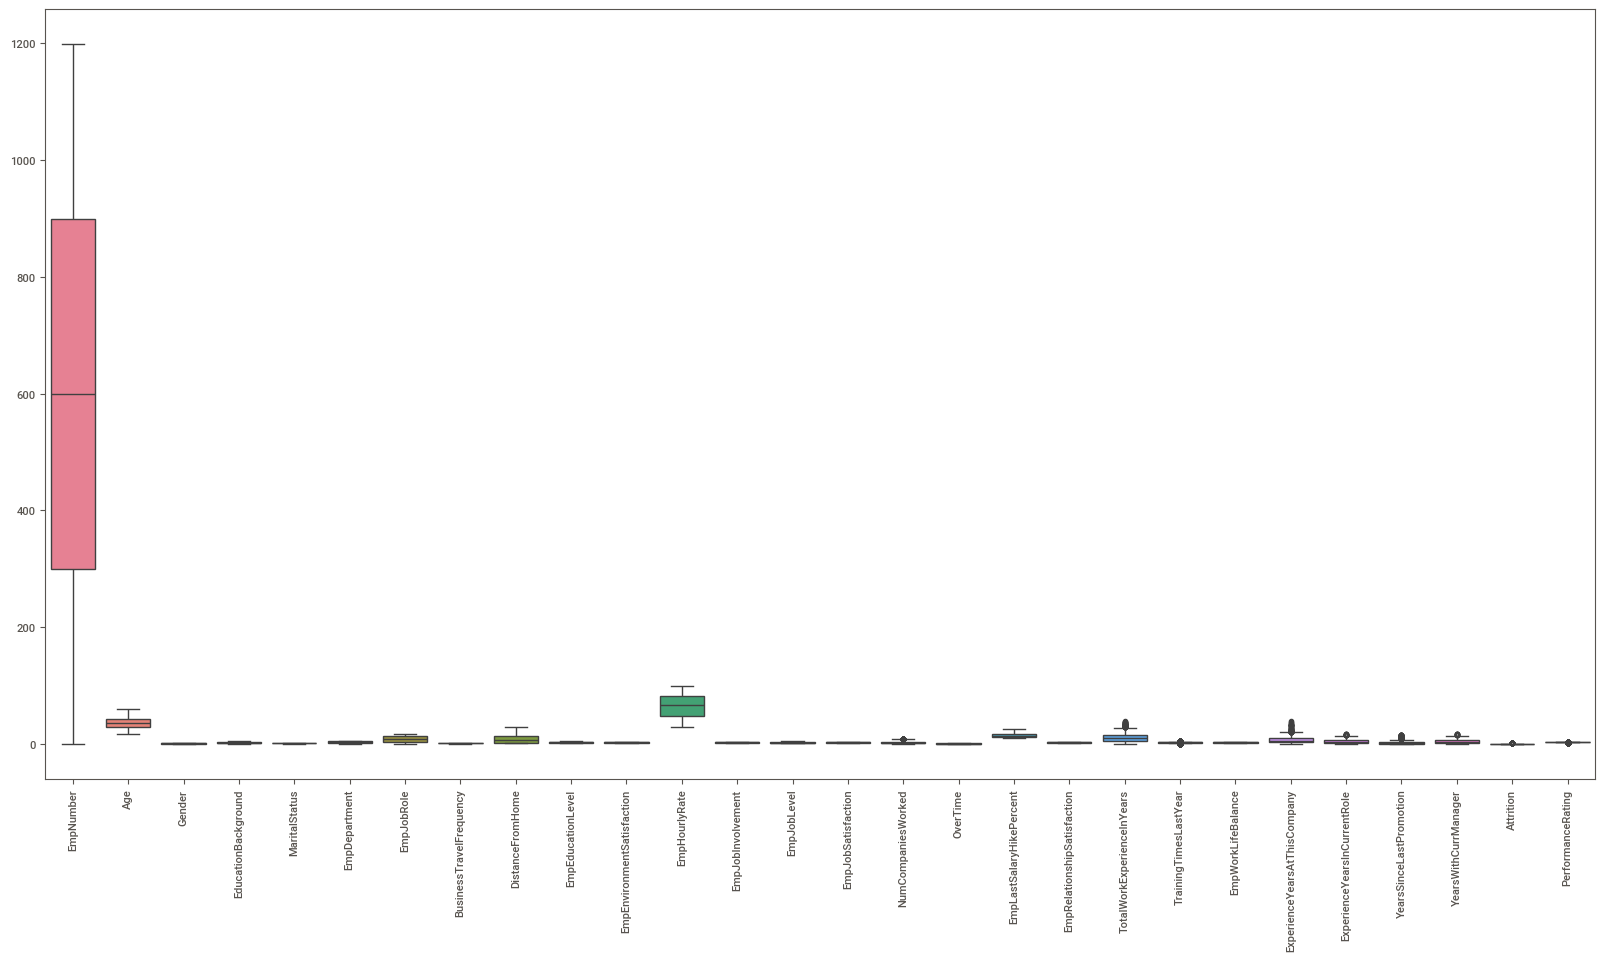

In [22]:
# Visualize feature importances
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [23]:
# Drop 'EmpNumber' and the target 'PerformanceRating'
df_heatmap = data.drop(columns=['EmpNumber', 'PerformanceRating'])

# Create a correlation matrix
correlation_matrix = df_heatmap.corr()

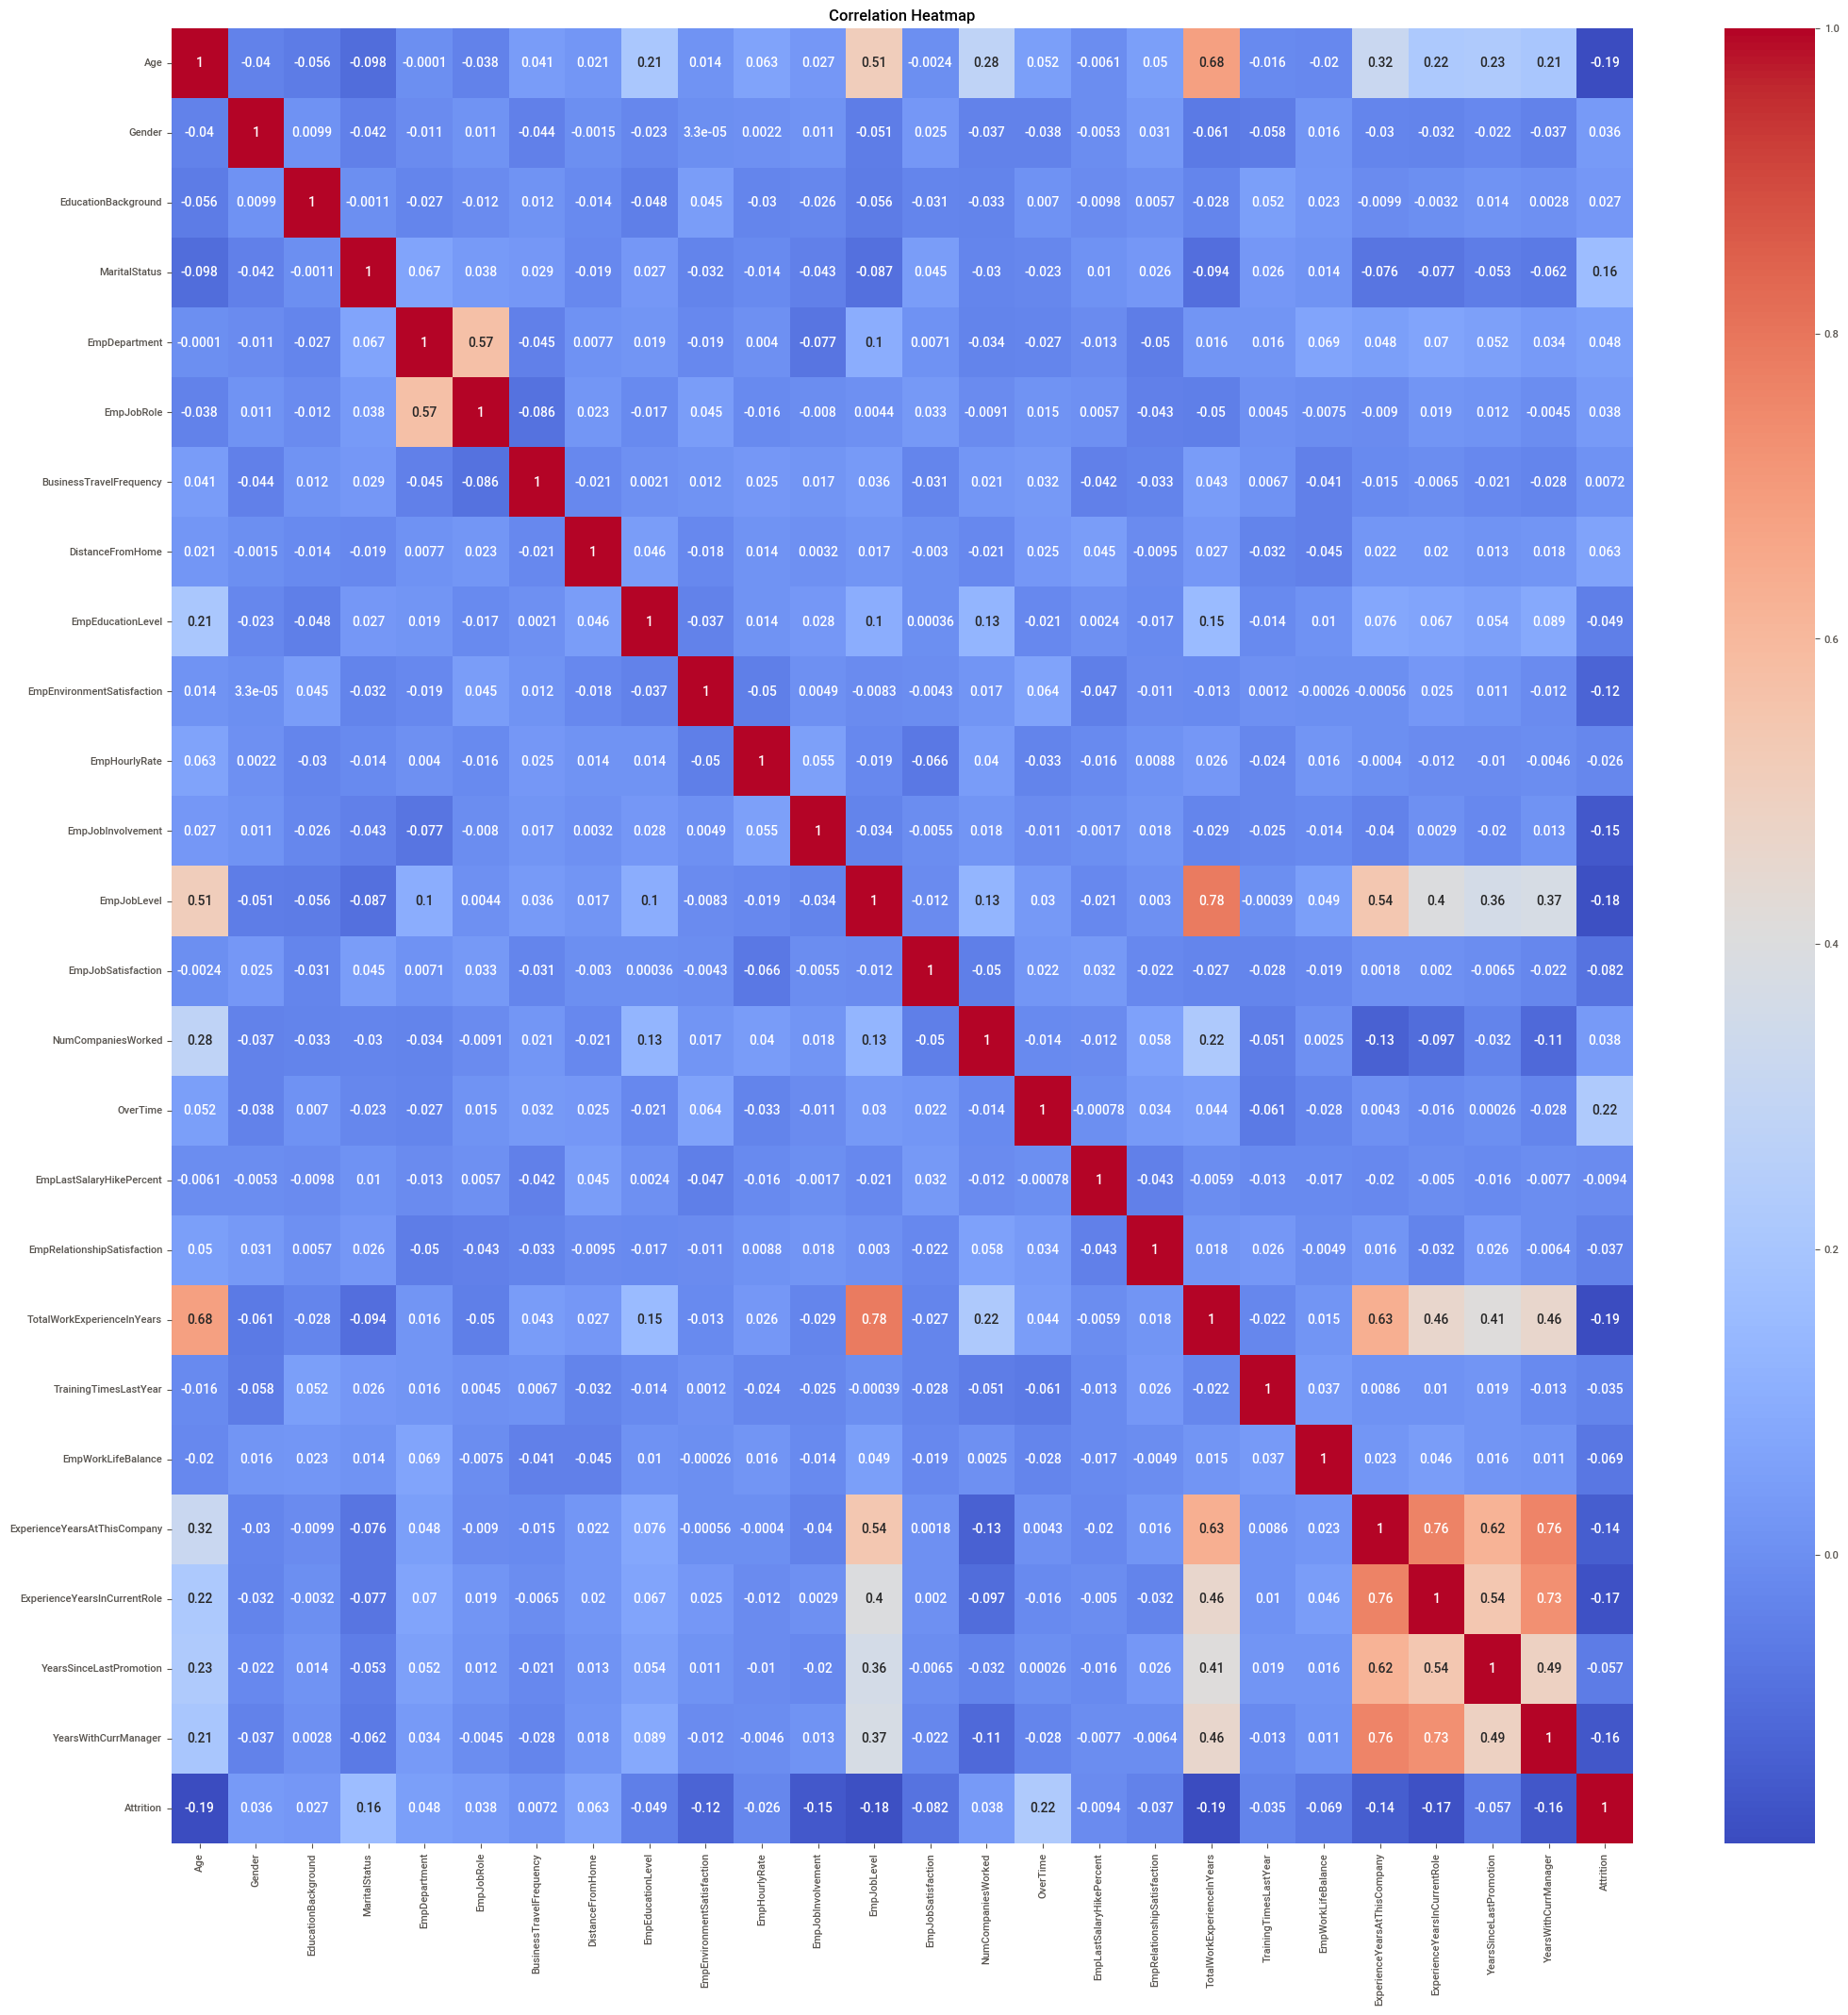

In [24]:
# Correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

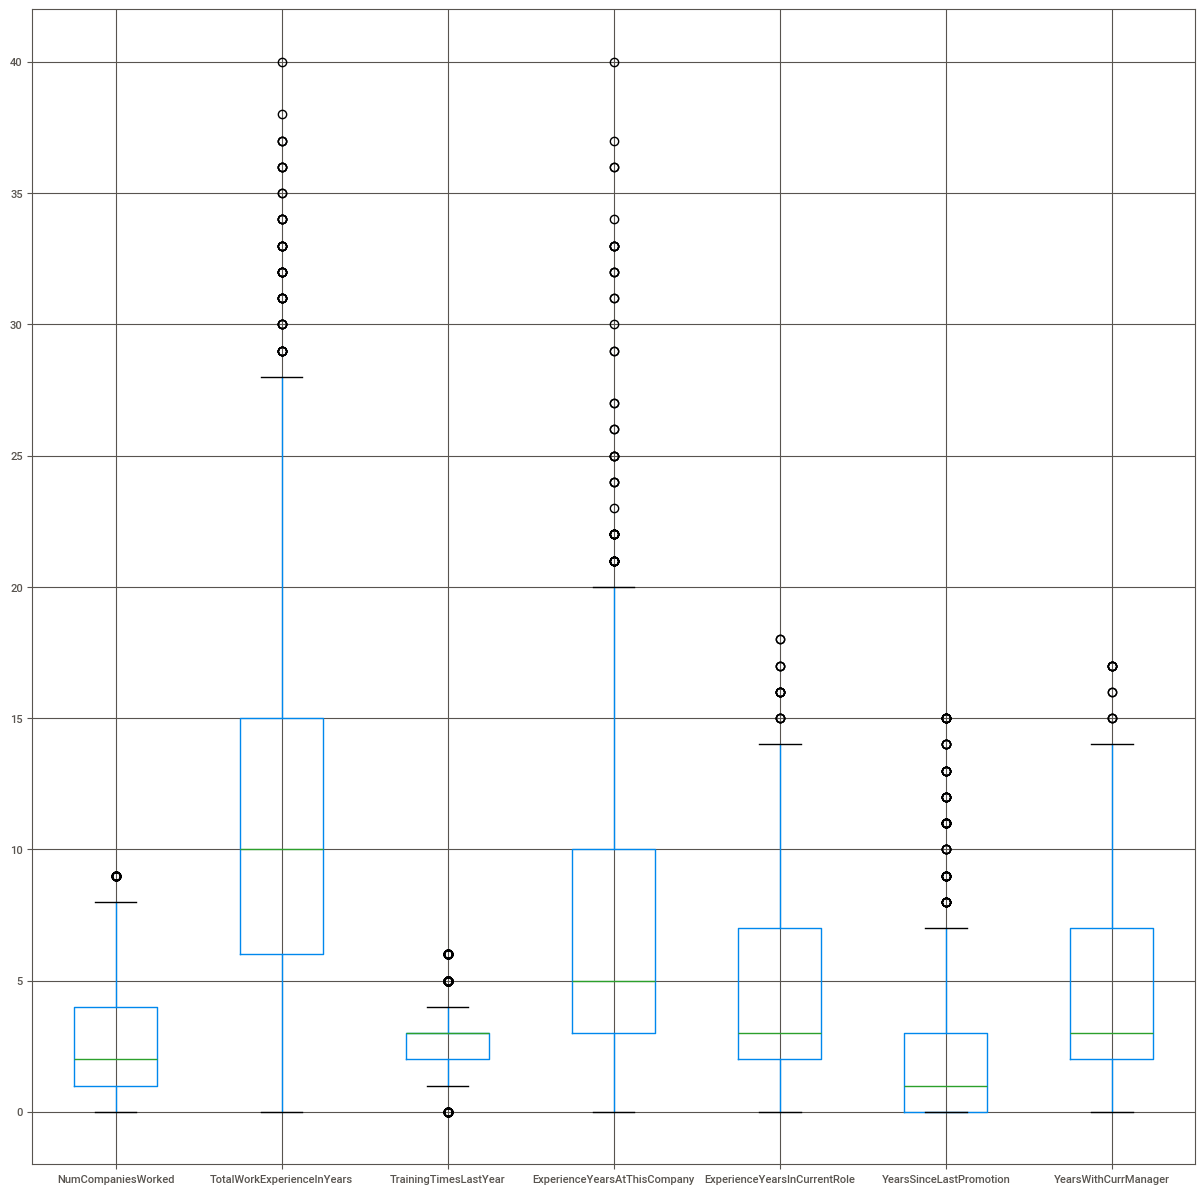

In [25]:
# Checking for outliers
plt.figure(figsize=(15,15))
data[['NumCompaniesWorked','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].boxplot();

1082/1200 data points remain


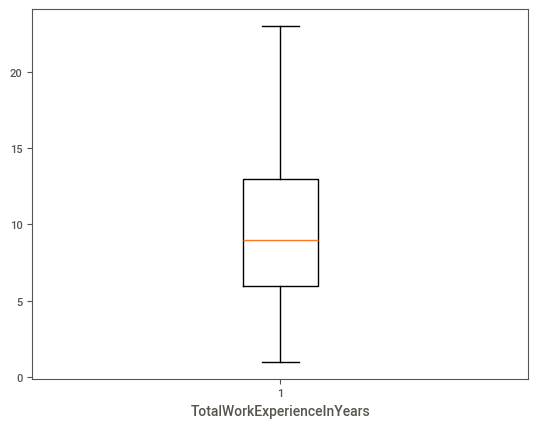

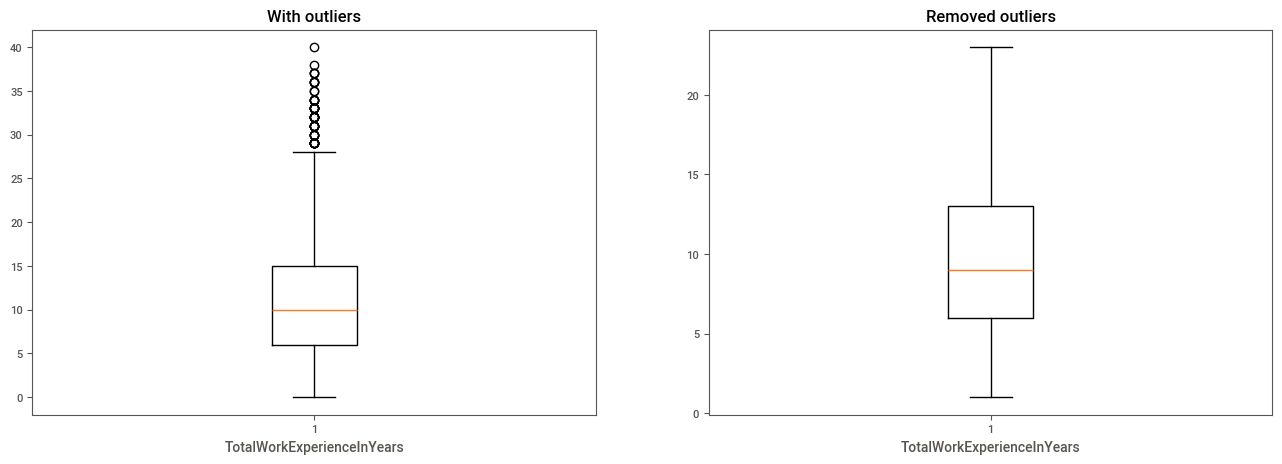

In [26]:
# Removing outliers for TotalWorkExperienceInYears
X=data.TotalWorkExperienceInYears
removed_outliers_TotalWorkExperienceInYears = X.between(X.quantile(0.01),X.quantile(0.90))
print(str(X[removed_outliers_TotalWorkExperienceInYears].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_TotalWorkExperienceInYears]);
plt.xlabel("TotalWorkExperienceInYears")
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_TotalWorkExperienceInYears]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("TotalWorkExperienceInYears")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("TotalWorkExperienceInYears")

data['clean_TotalWorkExperienceInYears']=X[removed_outliers_TotalWorkExperienceInYears]

985/1200 data points remain


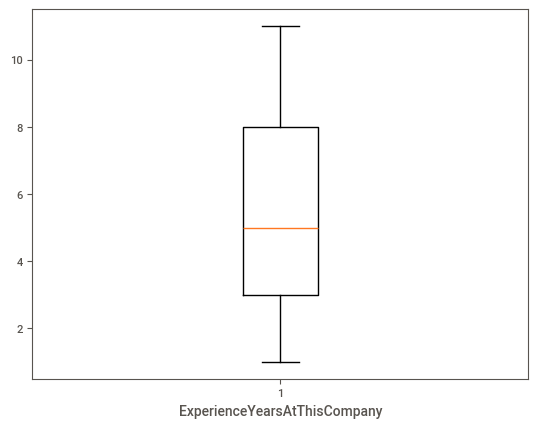

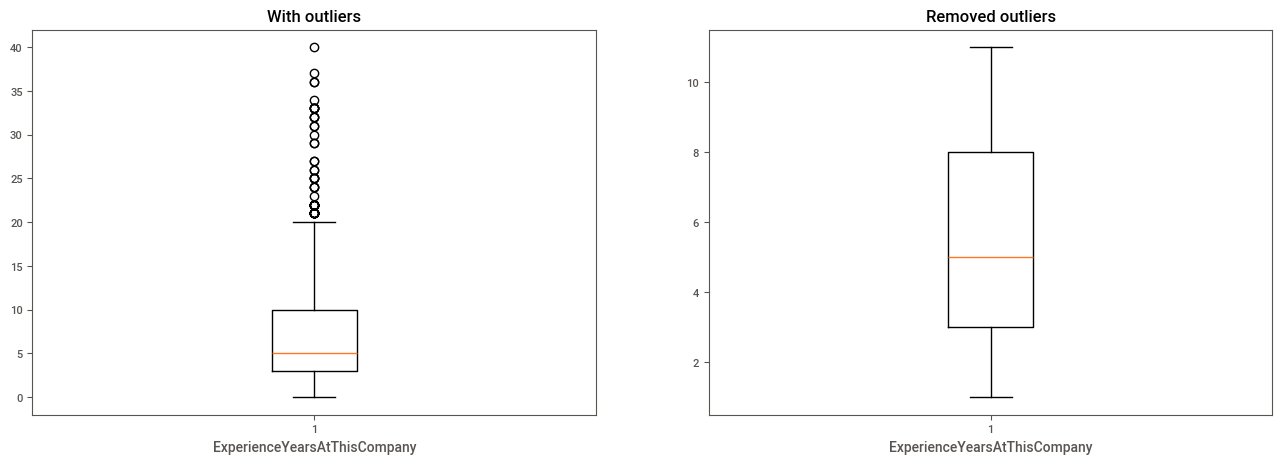

In [27]:
# Removing outliers for ExperienceYearsAtThisCompany
X=data.ExperienceYearsAtThisCompany
removed_outliers_ExperienceYearsAtThisCompany = X.between(X.quantile(0.05),X.quantile(0.85))
print(str(X[removed_outliers_ExperienceYearsAtThisCompany].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_ExperienceYearsAtThisCompany]);
plt.xlabel("ExperienceYearsAtThisCompany")
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_ExperienceYearsAtThisCompany]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("ExperienceYearsAtThisCompany")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("ExperienceYearsAtThisCompany")

data['clean_ExperienceYearsAtThisCompany']=X[removed_outliers_ExperienceYearsAtThisCompany]

1026/1200 data points remain


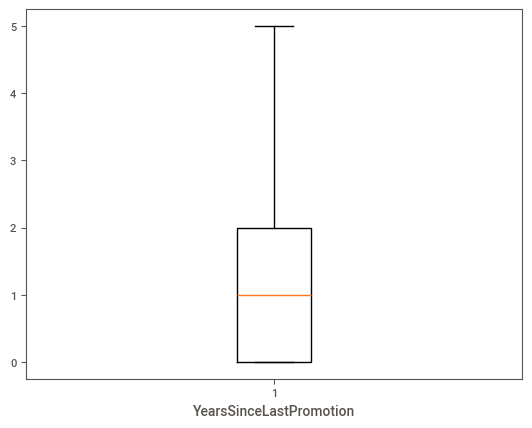

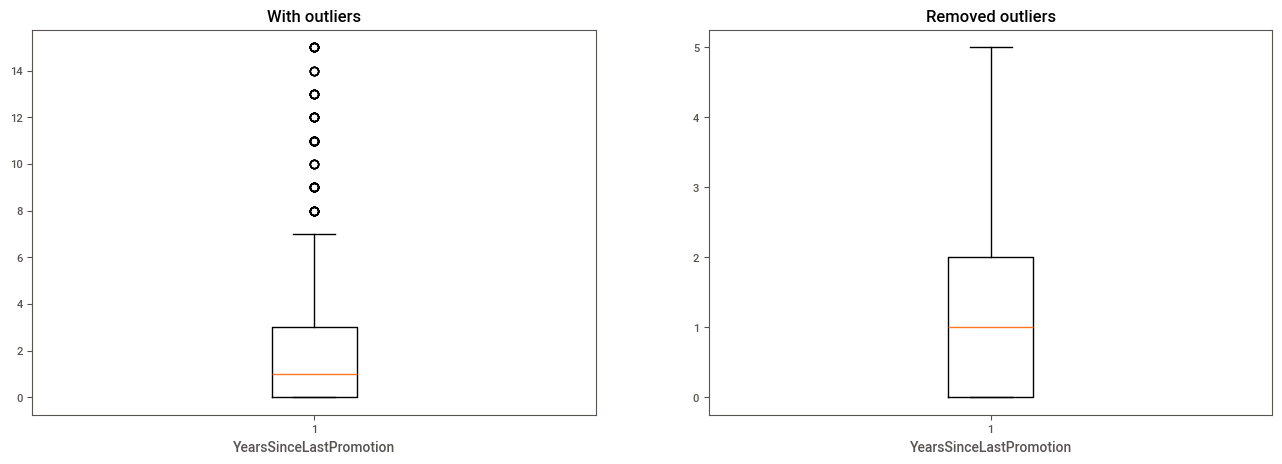

In [28]:
# Removing outliers for YearsSinceLastPromotion
X=data.YearsSinceLastPromotion
removed_outliers_YearsSinceLastPromotion = X.between(X.quantile(0.09),X.quantile(0.85))
print(str(X[removed_outliers_YearsSinceLastPromotion].size)+"/"+str(X.size)+" data points remain")
plt.boxplot(X[removed_outliers_YearsSinceLastPromotion]);
plt.xlabel("YearsSinceLastPromotion")
figure,axis=plt.subplots(1,2,figsize=(16,5))
axis[0].boxplot(X);
axis[1].boxplot(X[removed_outliers_YearsSinceLastPromotion]);
axis[0].set_title("With outliers") 
axis[0].set_xlabel("YearsSinceLastPromotion")
axis[1].set_title("Removed outliers")
axis[1].set_xlabel("YearsSinceLastPromotion")

data['clean_YearsSinceLastPromotion']=X[removed_outliers_YearsSinceLastPromotion]

In [29]:
# Filling missing numeric values in dataset with the most frequent value (mode)
for col in data.select_dtypes(include=['object', 'number']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [30]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,clean_TotalWorkExperienceInYears,clean_ExperienceYearsAtThisCompany,clean_YearsSinceLastPromotion
0,0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3,10.0,10.0,0.0
1,1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3,20.0,7.0,1.0
2,2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4,20.0,5.0,1.0
3,3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3,23.0,5.0,0.0
4,4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3,10.0,2.0,2.0


In [31]:
from sklearn.svm import SVR

In [32]:
# Task No.2:-

In [33]:
# Feature columns (exclude performance score from input features)
features = data.drop(columns=['PerformanceRating'])

In [34]:
# Encode categorical variables
features = pd.get_dummies(features)

In [35]:
# Target column
target = data['PerformanceRating']

In [36]:
# Features and Target
X = data.drop(columns=[ 'PerformanceRating'])  
y = data['PerformanceRating']

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [38]:
# Standardize features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Different Machine Learning Algorithms to train and predict the mode
# Using Random forest Classifier

In [40]:

models = {
    #'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    'Support Vector Classifier':SVC(),
    'KNN':KNeighborsClassifier(),
    'Naive Bayes':GaussianNB(),
    'Bagging':BaggingClassifier()
}


In [41]:

results = {}
for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)  
    cr = classification_report(y_test, y_pred) 
    results[name] = accuracy  

    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification report")
    print(cr)



Model: Random Forest
Accuracy: 95.00%
Classification report
              precision    recall  f1-score   support

           2       0.96      0.93      0.95        29
           3       0.95      0.99      0.97       184
           4       0.95      0.70      0.81        27

    accuracy                           0.95       240
   macro avg       0.95      0.87      0.91       240
weighted avg       0.95      0.95      0.95       240


Model: Decision Tree
Accuracy: 90.83%
Classification report
              precision    recall  f1-score   support

           2       0.87      0.93      0.90        29
           3       0.96      0.92      0.94       184
           4       0.68      0.78      0.72        27

    accuracy                           0.91       240
   macro avg       0.83      0.88      0.85       240
weighted avg       0.91      0.91      0.91       240


Model: Support Vector Classifier
Accuracy: 76.67%
Classification report
              precision    recall  f1-score

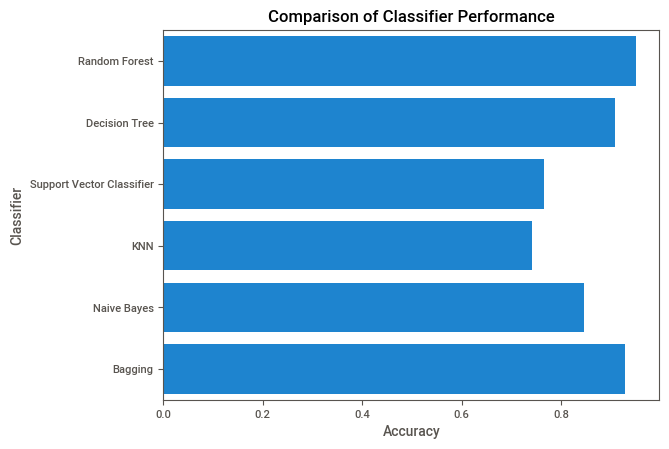

In [42]:
# Compare the performance of each classifier 
# data used here is before performing SMOTE
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
sns.barplot(x='Accuracy', y='Classifier', data=results_df)
plt.title('Comparison of Classifier Performance')
plt.show()

In [43]:
# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [44]:
# Feature importance(Random forest classifier)
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [45]:
# Top 3 factors
top_3_factors = feature_importances.head(3)

In [46]:
# Task No.2
print("Top 3 Important Factors Affecting Performance:")
top_3_factors

Top 3 Important Factors Affecting Performance:


,Feature,Importance
10,EmpEnvironmentSatisfaction,0.205364
17,EmpLastSalaryHikePercent,0.193202
24,YearsSinceLastPromotion,0.066232


In [47]:
data.groupby(by=['EmpDepartment'])['PerformanceRating'].mean()

EmpDepartment
0    3.050000
1    3.085873
2    2.775510
3    2.925926
4    2.921283
5    2.860590
Name: PerformanceRating, dtype: float64

In [48]:
# Using GridSearch Cross Validation(CV) in Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

In [49]:
model=RandomForestClassifier(max_depth=3,
                            criterion='gini',
                            n_estimators=10,
                            random_state=5)
parameters={'max_depth': [2,3],
              'n_estimators':[10,20],
              'random_state' : [5]}
grid=GridSearchCV(model,parameters,scoring='accuracy',cv=15)
grid.fit(X_train,y_train)

GridSearchCV(cv=15,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=5),
             param_grid={'max_depth': [2, 3], 'n_estimators': [10, 20],
                         'random_state': [5]},
             scoring='accuracy')

In [50]:
print("Best Score =  ",grid.best_score_)
print("Best Params = ",grid.best_params_)

Best Score =   0.8041666666666667
Best Params =  {'max_depth': 3, 'n_estimators': 10, 'random_state': 5}


In [51]:
# Task No.3

In [52]:
# Function to predict employee performance
def predict_employee_performance(model, input_data):
    
    # Get feature names used during training
    feature_names = X.columns.tolist()  # 'X' is the training data (features)
    
    # Create a dictionary with all features, initializing values to 0
    new_employee_dict = {feature: [0] for feature in feature_names}
    
    # Update dictionary with the actual values from input_data
    for key, value in input_data.items():
        if key in new_employee_dict:
            new_employee_dict[key] = [value]
    
    # Convert dictionary to DataFrame
    new_employee_df = pd.DataFrame(new_employee_dict)
    
    # Ensure the columns in new_employee_df match those used during training
    new_employee_df = new_employee_df[feature_names]
    
    # Predict the performance using the trained model
    predicted_performance = model.predict(new_employee_df)
    
    return predicted_performance[0]  # Return the predicted performance rating

In [53]:
# Example usage
new_employee_data = {
    'Age': 30,
    'Gender_Male': 1,
    'EducationBackground_Engineering': 1,
    'MaritalStatus_Single': 1,
    'EmpDepartment_Data Science': 1,
    'EmpJobRole_Data Scientist': 1,
    'BusinessTravelFrequency_Rarely': 1,
    'DistanceFromHome': 10,
    'EmpEducationLevel': 4,
    'EmpEnvironmentSatisfaction': 3,
    'EmpHourlyRate': 85,
    'EmpJobInvolvement': 3,
    'EmpJobLevel': 2,
    'EmpJobSatisfaction': 4,
    'NumCompaniesWorked': 2,
    'OverTime_Yes': 1,
    'EmpLastSalaryHikePercent': 15,
    'EmpRelationshipSatisfaction': 3,
    'clean_TotalWorkExperienceInYears': 7,
    'TrainingTimesLastYear': 2,
    'EmpWorkLifeBalance': 3,
    'clean_ExperienceYearsAtThisCompany': 5,
    'ExperienceYearsInCurrentRole': 3,
    'clean_YearsSinceLastPromotion': 2,
    'YearsWithCurrManager': 4,
    'Attrition_No': 1
}


In [54]:
# Call the function to predict employee performance (Task No.3)

predicted_performance = predict_employee_performance(rf_clf, new_employee_data)
print(f"Predicted Performance Rating for new hire: {predicted_performance}")

Predicted Performance Rating for new hire: 3


In [55]:
# Task No.4:- 

In [56]:
# based on the top features
if 'EmpLastSalaryHikePercent' in top_3_factors['Feature'].values:
    print("Recommendation: Improve work-life balance for employees to boost performance.")

if 'EmpEnvironmentSatisfaction' in top_3_factors['Feature'].values:
    print("Recommendation: Increase training opportunities for underperforming employees.")

if 'YearsSinceLastPromotion' in top_3_factors['Feature'].values:
    print("Recommendation: Tailor performance incentives based on specific job roles to drive better results.")


Recommendation: Improve work-life balance for employees to boost performance.
Recommendation: Increase training opportunities for underperforming employees.
Recommendation: Tailor performance incentives based on specific job roles to drive better results.


<font size=6> Business Case for Employee Performance Prediction Project:</font>
<div style="line-height: 2;"> 

INX Future Inc. has been facing declining employee performance and reduced client satisfaction, which threatens its reputation </br>
as a top employer and affects overall business outcomes. The company's leadership, concerned about penalizing employees </br>
without understanding the core causes, initiated this project to identify the factors driving poor performance and predict </br>
future employee performance.</br>
This data-driven approach aims to:</br>
• Diagnose Performance Issues: Identify key factors affecting employee performance.</br>
• Optimize Hiring: Use predictive models to hire employees who are more likely to perform well.</br>
• Improve Employee Retention: Provide actionable recommendations to enhance work-life balance, job satisfaction, and overall performance.</br>

By improving employee performance, INX Future Inc. can enhance service delivery, increase client satisfaction, </br>
and maintain its reputation as a top employer in the industry.</br>
</div>

<font size=6> Challenges Faced in the Project: </font>
<div style="line-height: 2;"> 

• Imbalanced Data: Some departments and job roles were underrepresented, leading to potential model bias.</br>
• Handling Categorical Variables: Proper encoding of features like EmpDepartment and Gender was necessary.</br>
• Multicollinearity: Highly correlated features, like Job Level and Work Experience, required careful selection to avoid overfitting.</br>
• Complex Target Prediction: Employee performance is influenced by intangible factors, making accurate prediction challenging.</br>
• Unseen Data: The model struggled with predicting for new categories not seen during training.</br>
• Feature Scaling: Ensuring consistent scaling and normalization for numerical features to improve model performance.</br>
</div>

<font size=6>Recommendations to Improve Employee Performance</font>

<div style="line-height: 2;"> 
1.Enhance Work Environment Satisfaction:</br>
 •Create programs to improve workplace satisfaction, such as wellness initiatives, flexible work hours, and mental health support. Consider implementing surveys to gauge employee satisfaction and adjust policies based on feedback.</br>

2.Incorporate Regular Salary Reviews: </br>
•Since "EmpLastSalaryHikePercent" is a significant factor, introduce performance-based salary reviews and clear growth paths. This can address compensation-related concerns and motivate employees to perform at their best.

3.Promote Career Advancement Opportunities:</br>
• The analysis highlights the importance of "YearsSinceLastPromotion." Encourage internal career growth by creating more frequent promotion cycles, mentorship programs, and skill-building workshops to support upward mobility within the company.</br>

4.Tailored Departmental Support: </br>
•Analyze department-specific performance trends to identify areas requiring targeted improvement. Departments with lower average performance ratings may benefit from customized training or resources to address specific challenges.
</div>

<font size=6>Project Summary :</font>
<div style="line-height: 2;"> 

INX Future Inc., a leading data analytics and automation solutions provider, has been facing a decline in employee performance metrics, leading to client dissatisfaction and an 8% drop in service quality. Concerned about the morale impact of penalizing employees, the CEO initiated a data science project to identify core factors affecting performance and to develop a predictive model. After testing multiple models, the Random Forest model achieved the highest accuracy at 95%, and it identified "EmpEnvironmentSatisfaction," "EmpLastSalaryHikePercent," and "YearsSinceLastPromotion" as the top factors influencing performance. These insights provide actionable recommendations for enhancing employee engagement and satisfaction, aligning with INX's reputation as a top employer
</div>

<div style="line-height: 2;"> •	What were the most important features selected for analysis and why?</br>


The most important features identified in the analysis were:</br>
1.EmpEnvironmentSatisfaction: </br> 
This feature measures employee satisfaction with their work environment, which includes aspects such as workspace conditions, resources, and overall workplace ambiance. High employee satisfaction often correlates with increased productivity, engagement, and retention. When employees feel comfortable and supported in their work environment, they are more likely to perform well, making this factor critical to understanding performance.</br>

2.EmpLastSalaryHikePercent:</br> This feature represents the most recent percentage increase in an employee's salary. Salary hikes are a key motivator for employees, reflecting the company’s recognition and reward of their efforts. Employees who feel that their compensation aligns with their contributions tend to be more motivated and engaged, which positively impacts their performance. Salary adjustments can also reflect career progression and acknowledgment, making this a significant factor.</br>

3.YearsSinceLastPromotion: This feature tracks the time since an employee's last promotion, indicating their career progression within the company. Employees who experience regular promotions tend to feel valued and see a future with the company. Long gaps without promotion can lead to dissatisfaction, stagnation, and potentially lower performance. This feature was essential because a lack of progression can demotivate employees, affecting their productivity and contribution to the company’s goals.</br>
</div>

<div style="line-height: 2;">
2. Did you make any important feature transformations? </br>

1.Encoding Categorical Variables:</br>
Categorical features such as Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, and BusinessTravelFrequency were likely transformed into numerical representations.
Techniques like one-hot encoding or label encoding would be used to convert these categories into numerical format, making them suitable for machine learning models.</br>

2.Binning/Discretizing Numerical Variables:</br>
Some continuous variables like Age and DistanceFromHome might have been grouped into bins (ranges) to capture patterns that aren't easily identifiable with raw numbers. For example, grouping Age into categories like "20-30," "30-40," etc., could help in identifying performance trends by age group.</br>

3.Standardization/Normalization of Features:</br>
For features with different ranges, such as EmpHourlyRate, EmpLastSalaryHikePercent, and TotalWorkExperienceInYears, scaling was likely applied. Standardization (transforming to have mean 0 and standard deviation 1) or normalization (scaling between 0 and 1) helps models that are sensitive to feature scaling, such as Support Vector Machines and K-Nearest Neighbors.</br>

4.Handling Missing Values:</br>
Missing values in features like NumCompaniesWorked, EmpEnvironmentSatisfaction, and EmpWorkLifeBalance were likely imputed or filled. Depending on the extent of missing data, imputation could be done using methods like the mean, median, or mode of the feature, or using more advanced techniques like K-Nearest Neighbors imputation.</br>

5.Feature Engineering for Experience Variables:</br>
Experience-related features like TotalWorkExperienceInYears, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, and YearsWithCurrManager might have been combined or transformed to create new features. For example, a feature like "loyalty index" could be calculated by dividing ExperienceYearsAtThisCompany by TotalWorkExperienceInYears, which could help assess employee retention tendencies.</br>

6.Transforming Target Variable (if needed):</br>
If the target variable PerformanceRating was imbalanced across classes (e.g., fewer high or low ratings), techniques like oversampling or undersampling could be applied. Additionally, PerformanceRating might have been encoded to ensure that it is properly treated as a categorical variable in classification models.</br>

</div>

<div style="line-height: 2;">
3. Correlation or interactions among the features selected and how it is considered? </br>

Correlation analysis and pairwise interaction testing were used to identify relationships between features, especially among experience-related ones (e.g., TotalWorkExperienceInYears and ExperienceYearsAtThisCompany). High correlations were managed to prevent multicollinearity. Interaction effects between features like EmpEnvironmentSatisfaction and OverTime were also considered to capture complex relationships impacting performance.


 </div>

<div style="line-height: 2;"> 
4. Did you find any interesting relationships in the data that don't fit in the sections above? </br>

Yes, an interesting relationship was found between OverTime and EmpWorkLifeBalance. Employees who frequently worked overtime tended to report lower work-life balance scores, which could contribute to burnout and lower performance over time. Additionally, YearsWithCurrManager showed a pattern where longer manager relationships often correlated with higher job satisfaction, suggesting that stable managerial support positively impacts employee morale and performance. These insights highlight areas where management practices and workload adjustments could improve overall employee well-being and productivity
</div>

<div style="line-height: 2;">
5. What is most important technique you used in this project?</br>

The most important technique used in this project was feature importance analysis through the Random Forest model. Random Forest not only provided a high accuracy rate in predicting employee performance but also helped identify key factors (such as EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, and YearsSinceLastPromotion) that strongly influence performance. By analyzing feature importance scores, we were able to pinpoint the primary drivers of employee performance, enabling targeted recommendations and focusing on meaningful improvements aligned with INX’s goals.
</div>

<div style="line-height: 2;">
4. More business insights you gain from the analysis.</br>
The analysis revealed that improving EmpEnvironmentSatisfaction could significantly boost performance across departments, highlighting the importance of a positive work environment. Additionally, frequent EmpLastSalaryHikePercent adjustments can enhance motivation, while addressing long intervals since the last promotion could reduce disengagement. Finally, managing overtime and promoting work-life balance may prevent burnout, supporting sustainable productivity.
</div>